In [72]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [73]:
expl_method = "GradCAM"
# expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
# transform = ['color'] 
# transform = ['spatial', 'noise', 'color']
transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [74]:
with open(f"val_center_crop_224_seed_{seed}.npy", "rb") as f:
    filelist = np.load(f)

In [75]:
base = []
our = []
avg = []

read_num = 0

for filepath in filelist:
    filename = os.path.basename(filepath)

    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_perturb_num_1000_{filename}.pt"
    try:

        log = torch.load(log_name)
        base.append(log[0])
        our.append(log[1])
        avg.append(log[2])
        read_num += 1
    except:
        break
base = torch.stack(base)
our = torch.stack(our)
avg = torch.stack(avg)


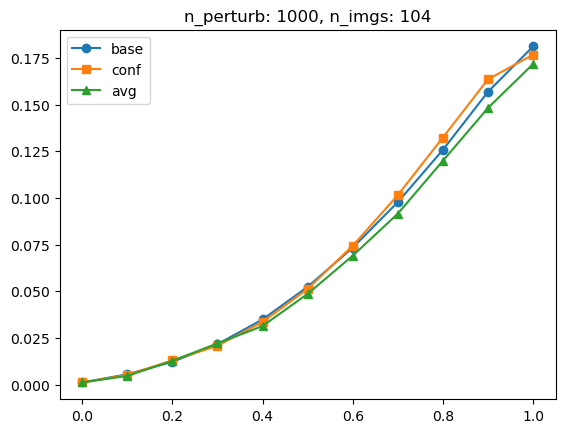

In [76]:
plt.plot(np.arange(0, 1.05, 0.1), (base.mean(0)), '-o', label="base")
plt.plot(np.arange(0, 1.05, 0.1), our.mean(0), '-s', label = "conf")
plt.plot(np.arange(0, 1.05, 0.1), avg.mean(0), '-^', label = "avg")

plt.title(f"n_perturb: 1000, n_imgs: {read_num}")
plt.legend()


In [71]:
print((base).mean(), (our).mean(), (avg).mean())

tensor(0.0720) tensor(0.0731) tensor(0.0673)
